# Trabalho 5 - Algoritmo Genético

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parâmetros Configuráveis
NUM_INDIVIDUOS = 4       # População inicial (pode aumentar até 30)
NUM_GERACOES = 5         # Número de gerações (pode aumentar até 20)
TAXA_CROSSOVER = 0.70    # 70%
TAXA_MUTACAO = 0.01      # 1%
INTERVALO = [-10, 10]
NUM_BITS = 10            # Precisão da representação binária

In [2]:
# Função Objetivo
def f(x):
    return x**2 - 3*x + 4

# Decodificação: Binário -> Real
def bin_to_real(bin_list, intervalo, num_bits):
    # Converte lista de bits para inteiro
    inteiro = int("".join(str(b) for b in bin_list), 2)
    # Mapeia para o intervalo real
    min_val, max_val = intervalo
    precisao = (max_val - min_val) / (2**num_bits - 1)
    return min_val + inteiro * precisao

# Criar Indivíduo (Vetor Binário)
def criar_individuo(num_bits):
    return [random.randint(0, 1) for _ in range(num_bits)]

# Criar População Inicial
def criar_populacao(num_individuos, num_bits):
    return [criar_individuo(num_bits) for _ in range(num_individuos)]

In [3]:
# Operadores Genéticos

def selecao_torneio(populacao, fitnesses, k=3):
    # Seleciona k indivíduos aleatoriamente e retorna o melhor
    selecionados = random.sample(list(zip(populacao, fitnesses)), k=min(k, len(populacao)))
    selecionados.sort(key=lambda x: x[1], reverse=True) # Maior fitness primeiro
    return selecionados[0][0]

def crossover(pai1, pai2, taxa_crossover):
    if random.random() < taxa_crossover:
        ponto_corte = random.randint(1, len(pai1) - 1)
        filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
        filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
        return filho1, filho2
    return pai1[:], pai2[:]

def mutacao(individuo, taxa_mutacao):
    novo_individuo = individuo[:]
    for i in range(len(novo_individuo)):
        if random.random() < taxa_mutacao:
            novo_individuo[i] = 1 - novo_individuo[i] # Inverte bit
    return novo_individuo

In [6]:
# Execução do Algoritmo Genético

populacao = criar_populacao(NUM_INDIVIDUOS, NUM_BITS)
melhores_fitness_por_geracao = []
media_fitness_por_geracao = []

print(f"Iniciando AG com {NUM_INDIVIDUOS} indivíduos por {NUM_GERACOES} gerações.\n")

for geracao in range(NUM_GERACOES):
    # Avaliação
    valores_reais = [bin_to_real(ind, INTERVALO, NUM_BITS) for ind in populacao]
    fitnesses = [f(x) for x in valores_reais]
    
    # Estatísticas
    melhor_fit = max(fitnesses)
    media_fit = np.mean(fitnesses)
    melhor_ind_idx = fitnesses.index(melhor_fit)
    melhor_x = valores_reais[melhor_ind_idx]
    
    melhores_fitness_por_geracao.append(melhor_fit)
    media_fitness_por_geracao.append(media_fit)
    
    print(f"Geração {geracao+1}: Melhor Fitness = {melhor_fit:.4f} (x = {melhor_x:.4f})")
    
    # Nova População
    nova_populacao = []
    while len(nova_populacao) < NUM_INDIVIDUOS:
        # Seleção
        pai1 = selecao_torneio(populacao, fitnesses)
        pai2 = selecao_torneio(populacao, fitnesses)
        
        # Crossover
        filho1, filho2 = crossover(pai1, pai2, TAXA_CROSSOVER)
        
        # Mutação
        filho1 = mutacao(filho1, TAXA_MUTACAO)
        filho2 = mutacao(filho2, TAXA_MUTACAO)
        
        nova_populacao.extend([filho1, filho2])
    
    # Ajusta tamanho da população se exceder (caso ímpar, etc)
    populacao = nova_populacao[:NUM_INDIVIDUOS]

# Resultado Final
melhor_geral_idx = np.argmax(fitnesses)
melhor_x_final = valores_reais[melhor_geral_idx]
melhor_fit_final = fitnesses[melhor_geral_idx]

print(f"\nMelhor solução encontrada: x = {melhor_x_final:.4f}, f(x) = {melhor_fit_final:.4f}")

Iniciando AG com 4 indivíduos por 5 gerações.

Geração 1: Melhor Fitness = 124.2925 (x = -9.5699)
Geração 2: Melhor Fitness = 124.2925 (x = -9.5699)
Geração 3: Melhor Fitness = 124.2925 (x = -9.5699)
Geração 4: Melhor Fitness = 124.2925 (x = -9.5699)
Geração 5: Melhor Fitness = 124.2925 (x = -9.5699)

Melhor solução encontrada: x = -9.5699, f(x) = 124.2925


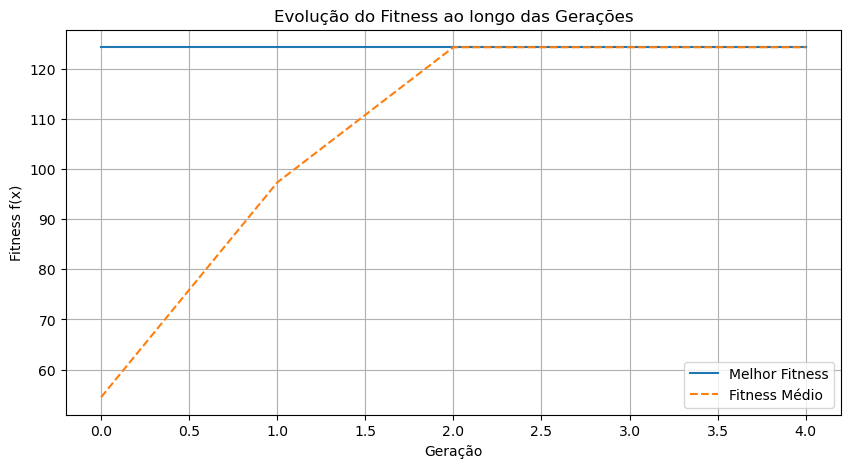

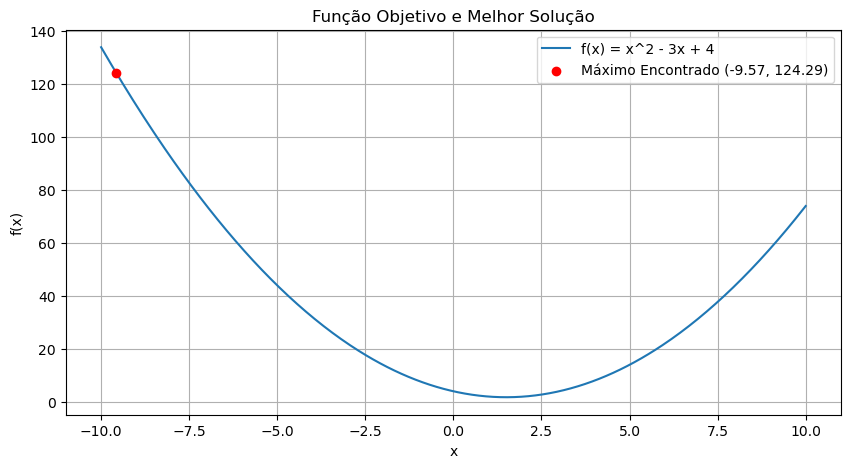

In [7]:
# Visualização
plt.figure(figsize=(10, 5))
plt.plot(melhores_fitness_por_geracao, label='Melhor Fitness')
plt.plot(media_fitness_por_geracao, label='Fitness Médio', linestyle='--')
plt.title('Evolução do Fitness ao longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Visualização da Função e do Ponto Encontrado
x = np.linspace(INTERVALO[0], INTERVALO[1], 400)
y = f(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x^2 - 3x + 4')
plt.scatter(melhor_x_final, melhor_fit_final, color='red', zorder=5, label=f'Máximo Encontrado ({melhor_x_final:.2f}, {melhor_fit_final:.2f})')
plt.title('Função Objetivo e Melhor Solução')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()